## ___Feature Scaling___

Many machine learning algorithms are sensitive to the magnitude of the variables, therefore it is common practice to set all features within the same scale. Feature scaling is the method to limit the range of variables so that they can be compared on common grounds. It is performed on continuous variables.

There are multiple ways of feature scaling:

1. Standardisation
2. Min-Max Scaling
3. Robust Scaling
4. Scaling to Unit Length/Normalizer

### ___What do These Terms Mean?___

#### ___SCALING/NORMALIZATION___
Scale generally means to change the range of the values. The shape of the distribution doesn’t change. Think about how a scale model of a building has the same proportions as the original, just smaller. That’s why we say it is drawn to scale. The range is often set at 0 to 1.

#### ___STANDARDIZATION___
Standardize generally means changing the values so that the distribution standard deviation from the mean equals one. It outputs something very close to a normal distribution. 

### ___When to use them?___

**Normalization** is a good technique to use when you do not know the distribution of your data or when you know the distribution is not Gaussian (a bell curve). Normalization is useful when your data has varying scales and the algorithm you are using does not make assumptions about the distribution of your data, such as k-nearest neighbors and artificial neural networks.

**Standardization** assumes that your data has a Gaussian (bell curve) distribution. This does not strictly have to be true, but the technique is more effective if your attribute distribution is Gaussian. Standardization is useful when your data has varying scales and the algorithm you are using does make assumptions about your data having a Gaussian distribution, such as linear regression, logistic regression, and linear discriminant analysis.

In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

plt.style.use('seaborn-pastel')

#### ___MinMaxScaler___

The MinMaxScaler is the probably the most famous scaling algorithm, and follows the following formula for each feature:

xi–min(x)/max(x)–min(x)

It essentially shrinks the range such that the range is now between 0 and 1 (or -1 to 1 if there are negative values).

This scaler works better for cases in which the standard scaler might not work so well. If the distribution is not Gaussian or the standard deviation is very small, the min-max scaler works better.

However, it is sensitive to outliers, so if there are outliers in the data, you might want to consider the Robust Scaler below.

In [2]:
from sklearn.preprocessing import MinMaxScaler

df = pd.DataFrame({
    # positive skew
    'x1': np.random.chisquare(8, 1000),
    # negative skew 
    'x2': np.random.beta(8, 2, 1000) * 40,
    # no skew
    'x3': np.random.normal(50, 3, 1000)
})

scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled_df,columns = df.columns)
scaled_df

,x1,x2,x3
0,0.074081,0.347649,0.317927
1,0.129418,0.758964,0.662728
2,0.289376,0.905329,0.736856
3,0.159351,0.695689,0.489509
4,0.136106,0.913186,0.787941
...,...,...,...
995,0.324986,0.000000,0.327566
996,0.029323,0.048049,0.499714
997,0.262076,0.817318,0.460850
998,0.266782,0.623473,0.649488


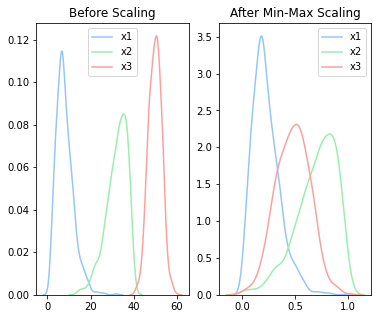

In [3]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(df['x1'], ax=ax1)
sns.kdeplot(df['x2'], ax=ax1)
sns.kdeplot(df['x3'], ax=ax1)

ax2.set_title('After Min-Max Scaling')
sns.kdeplot(scaled_df['x1'], ax=ax2)
sns.kdeplot(scaled_df['x2'], ax=ax2)
sns.kdeplot(scaled_df['x3'], ax=ax2)

plt.show()

#### ___Standard Scaler___

The StandardScaler assumes your data is normally distributed within each feature and will scale them such that the distribution is now centred around 0, with a standard deviation of 1.

The mean and standard deviation are calculated for the feature and then the feature is scaled based on:

xi–mean(x)/stdev(x)

If data is not normally distributed, this is not the best scaler to use.

In [4]:
from sklearn.preprocessing import StandardScaler

np.random.seed(20)
df = pd.DataFrame({
    'x1': np.random.normal(0, 2, 10000),
    'x2': np.random.normal(5, 3, 10000),
    'x3': np.random.normal(-5, 5, 10000)
})

scaler = StandardScaler()

scaled_df = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled_df, columns = df.columns)
scaled_df

,x1,x2,x3
0,0.867691,-0.268516,0.047348
1,0.179799,-0.059433,-1.751553
2,0.341439,0.180893,0.534637
3,-2.358822,-0.553496,0.113718
4,-1.100643,0.952949,0.693912
...,...,...,...
9995,-1.040998,2.029255,0.258566
9996,1.066069,0.155993,0.404322
9997,-0.847370,-0.752200,-1.110001
9998,-1.409089,0.992250,0.753575


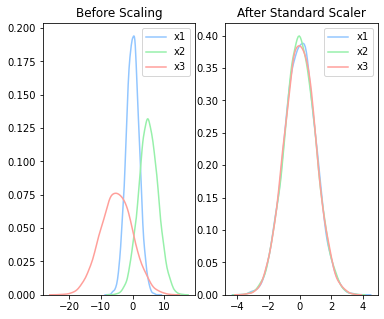

In [5]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(df['x1'], ax=ax1)
sns.kdeplot(df['x2'], ax=ax1)
sns.kdeplot(df['x3'], ax=ax1)

ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_df['x1'], ax=ax2)
sns.kdeplot(scaled_df['x2'], ax=ax2)
sns.kdeplot(scaled_df['x3'], ax=ax2)

plt.show()

#### ___Robust Scaler___
The RobustScaler uses a similar method to the Min-Max scaler but it instead uses the interquartile range, rathar than the min-max, so that it is robust to outliers. Therefore it follows the formula:

xi–Q1(x)/Q3(x)–Q1(x)

Of course this means it is using the less of the data for scaling so it’s more suitable for when there are outliers in the data.

In [0]:
from sklearn.preprocessing import RobustScaler

df = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20,1,1000), np.random.normal(1, 1, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 1, 1000), np.random.normal(50, 1, 25)]),
})

scaler = RobustScaler()
robust_scaled_df = scaler.fit_transform(df)
robust_scaled_df = pd.DataFrame(robust_scaled_df, columns=df.columns)

scaler = MinMaxScaler()
minmax_scaled_df = scaler.fit_transform(df)
minmax_scaled_df = pd.DataFrame(minmax_scaled_df, columns= df.columns)

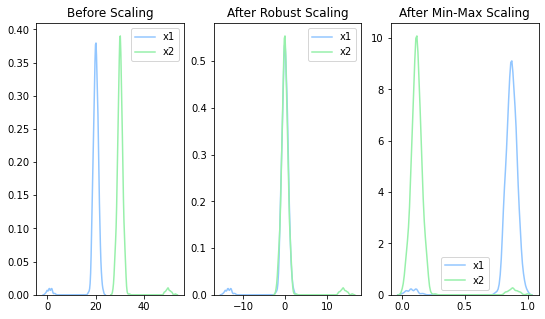

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(9, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(df['x1'], ax=ax1)
sns.kdeplot(df['x2'], ax=ax1)

ax2.set_title('After Robust Scaling')
sns.kdeplot(robust_scaled_df['x1'], ax=ax2)
sns.kdeplot(robust_scaled_df['x2'], ax=ax2)

ax3.set_title('After Min-Max Scaling')
sns.kdeplot(minmax_scaled_df['x1'], ax=ax3)
sns.kdeplot(minmax_scaled_df['x2'], ax=ax3)

plt.show()

After Robust scaling, the distributions are brought into the same scale and overlap, but the outliers remain outside of bulk of the new distributions.

However, in Min-Max scaling, the two normal distributions are kept seperate by the outliers that are inside the 0-1 range.

#### ___Normalizer___

The normalizer scales each value by dividing each value by its magnitude in n-dimensional space for n number of features.

Say your features were x, y and z Cartesian co-ordinates your scaled value for x would be:

xi/ sqrt(x2i+y2i+z2i)

Each point is now within 1 unit of the origin on this Cartesian co-ordinate system.

Normalizer works on the rows, not the columns.

--or--

Scaling to unit length refers to transforming the values of variable so that the complete variable vector has length one. In scaling to unit length, we divide each value of the variable by the Euclidean length or the norm of the variable.

In [0]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import Normalizer

df = pd.DataFrame({
    'x1': np.random.randint(-100, 100, 1000).astype(float),
    'y1': np.random.randint(-80, 80, 1000).astype(float),
    'z1': np.random.randint(-150, 150, 1000).astype(float),
})

scaler = Normalizer()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

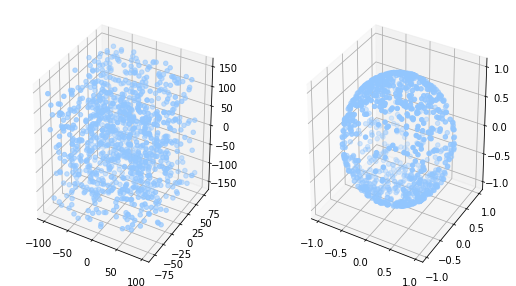

In [9]:
fig = plt.figure(figsize=(9, 5))

ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

ax1.scatter(df['x1'], df['y1'], df['z1'])
ax2.scatter(scaled_df['x1'], scaled_df['y1'], scaled_df['z1'])

plt.show()

Note that the points are all brought within a sphere that is at most 1 away from the origin at any point. Also, the axes that were previously different scales are now all one scale.

#### ___Conclusion___
1. Use MinMaxScaler as the default if you are transforming a feature. It’s non-distorting.
2. You could use RobustScaler if you have outliers and want to reduce their influence. However, you might be better off removing the outliers, instead.
3. Use StandardScaler if you need a relatively normal distribution.
4. Use Normalizer sparingly — it normalizes sample rows, not feature columns.